# Multi Layer Perceptron (MLP)

In [71]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
# Load Dataset using Tip.
df = sns.load_dataset("tips")
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [73]:
# Let's check the number of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols) 

Numerical columns: Index(['total_bill', 'tip', 'size'], dtype='object')
Categorical columns: Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [74]:
# Check for missing values
print(df.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [75]:
# Let's scale the nummerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

   total_bill       tip     sex smoker  day    time      size
0   -0.314711 -1.439947  Female     No  Sun  Dinner -0.600193
1   -1.063235 -0.969205    Male     No  Sun  Dinner  0.453383
2    0.137780  0.363356    Male     No  Sun  Dinner  0.453383
3    0.438315  0.225754    Male     No  Sun  Dinner -0.600193
4    0.540745  0.443020  Female     No  Sun  Dinner  1.506958


In [76]:
# Let's encode the categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df.head())    

   total_bill       tip  sex  smoker  day  time      size
0   -0.314711 -1.439947    0       0    2     0 -0.600193
1   -1.063235 -0.969205    1       0    2     0  0.453383
2    0.137780  0.363356    1       0    2     0  0.453383
3    0.438315  0.225754    1       0    2     0 -0.600193
4    0.540745  0.443020    0       0    2     0  1.506958


In [77]:
# -----------------------------
# Build and Train MLP Model for Regression
# -----------------------------

# Separate features (X) and target variable (y)
X = df.drop('tip', axis=1)   # All columns except 'tip'
y = df['tip']                # Target variable: tip amount

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert pandas DataFrames/Series into NumPy arrays (required by TensorFlow/Keras)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# -----------------------------
# Define the MLP model
# -----------------------------
model = models.Sequential()

# Input layer + first hidden layer (64 neurons, ReLU activation)
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)))

# Second hidden layer (32 neurons, ReLU activation)
model.add(layers.Dense(32, activation='relu'))

# Output layer (1 neuron for regression output, no activation)
model.add(layers.Dense(1))

# Compile the model with Adam optimizer, MSE loss, and MAE as evaluation metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# -----------------------------
# Training the model
# -----------------------------

# Early stopping: stop training if validation loss doesn't improve for 15 epochs,
# and restore the best weights
earlystopping = EarlyStopping(patience=15, restore_best_weights=True)

# Train the model with training data, validate on test data
history = model.fit(
    X_train_np, y_train_np,
    validation_data=(X_test_np, y_test_np),
    epochs=100,          # maximum epochs
    batch_size=32,       # number of samples per gradient update
    verbose=1,           # show training progress
    callbacks=[earlystopping]  # apply early stopping
)

# -----------------------------
# Evaluate the model
# -----------------------------
loss, mae = model.evaluate(X_test_np, y_test_np)
print(f"\nTest MAE: {mae:.4f}")  # Print Mean Absolute Error on test set



Epoch 1/100
7/7 [==============================] - 1s 29ms/step - loss: 1.2129 - mae: 0.7808 - val_loss: 0.6550 - val_mae: 0.7119
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9483 - mae: 0.7046 - val_loss: 0.5576 - val_mae: 0.6569
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8273 - mae: 0.6618 - val_loss: 0.4964 - val_mae: 0.6052
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7264 - mae: 0.6226 - val_loss: 0.4321 - val_mae: 0.5528
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6924 - mae: 0.6014 - val_loss: 0.4121 - val_mae: 0.5321
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6452 - mae: 0.5781 - val_loss: 0.3845 - val_mae: 0.5108
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6184 - mae: 0.5620 - val_loss: 0.3576 - val_mae: 0.4912
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6012 - mae: 0.5526 -

In [78]:
# -----------------------------
# Predictions (Actual vs Predicted)
# -----------------------------
y_pred = model.predict(X_test_np)  # Get predictions for test data

# Show first 10 comparisons
print("\nSample Predictions (Actual vs Predicted):")
for i in range(10):
    print(f"Actual: {y_test_np[i]:.2f}   Predicted: {y_pred[i][0]:.2f}")



2/2 [==============================] - 0s 3ms/step

Sample Predictions (Actual vs Predicted):
Actual: 0.13   Predicted: -0.02
Actual: -0.72   Predicted: -0.79
Actual: -0.72   Predicted: 0.63
Actual: 1.57   Predicted: 0.48
Actual: -0.72   Predicted: -0.45
Actual: -0.72   Predicted: -0.05
Actual: -0.32   Predicted: 0.50
Actual: -0.35   Predicted: -0.67
Actual: 0.17   Predicted: -0.38
Actual: 0.00   Predicted: -0.18


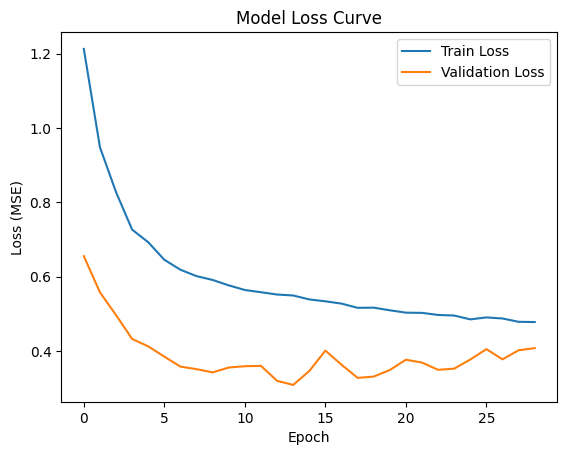

In [79]:
# -----------------------------
# Plot training & validation loss
# -----------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
